In [1]:
# numpy 설치 
! pip install numpy
# 주피터에선 !를 꼭 붙여줘야함

import numpy as np
import pandas as pd

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 248, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\commands\install.py", line 324, in run
    session = self.get_default_session(options)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 98, in get_default_session
    self._session = self.enter_context(self._build_session(options))
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Us

In [30]:
! pip install openpyxl

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 248, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\commands\install.py", line 324, in run
    session = self.get_default_session(options)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 98, in get_default_session
    self._session = self.enter_context(self._build_session(options))
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Us

In [31]:
sample_1=pd.read_excel('files/sample_1.xlsx',header=1,usecols='A:C',skipfooter=2) # 헤더랑 컬럼 골라서 불필요한 데이터는 걸러내고 불러내기
type(sample_1)

pandas.core.frame.DataFrame

In [32]:
sample_1

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [5]:
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    6 non-null      object
 1   성별      6 non-null      object
 2   입국객수    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes


In [6]:
sample_1.describe()

,입국객수
count,6.000000
mean,114995.333333
std,98105.752006
min,42.000000
25%,26819.250000
50%,132616.000000
75%,183305.000000
max,232943.000000


In [7]:
# 국적코드와 입국객수만 데이터를 보자
sample_1[['국적코드','입국객수']] # 2차원이니까 대괄호 2개 중요~~~!!!!! (또 틀림;)

# 기준연월 컬럼을 추가하고 값을 2019-11 넣어보자
sample_1['기준연월']='2019-11'
sample_1

,국적코드,성별,입국객수,기준연월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [8]:
# 성별이 남성인 정보를 추출해보자
m=(sample_1['성별']=='남성' )& (sample_1['입국객수']>=150000) # 시리즈 객체
sample_1[m] # 시리즈 객체를 데이터프레임에 불리언 인덱스로 넣기

,국적코드,성별,입국객수,기준연월
4,A18,남성,158912,2019-11


isin()

In [9]:
# 국적코드가 A01이거나 A18인 행만 출력 (같은 컬럼의 값이기 때문에 isin쓰면 더 편함)
m= sample_1['국적코드'].isin(['A01', 'A18'])
sample_1[m]
# 아닌 것 출력
sample_1[m==False]


,국적코드,성별,입국객수,기준연월
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11


# merge

In [10]:
# merge
sample_1

,국적코드,성별,입국객수,기준연월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [11]:
# 코드마스터를 조인 국적코드가 같은것들만 그룹바이아님? 머지? 머지가 머지? ㅋㅋ
code_master=pd.read_excel('files/sample_codemaster.xlsx')
code_master

,국적코드,국적명
0,A01,일본
1,A02,대만
2,A03,홍콩
3,A18,중국
4,A19,이란
5,A22,우즈베키스탄
6,A23,카자흐스탄
7,A99,아시아 기타


In [12]:
sample_1_merge_left=pd.merge(left=sample_1, right=code_master, how='left', left_on='국적코드', right_on='국적코드') # left 조인 이쥬?
sample_1_merge_left

,국적코드,성별,입국객수,기준연월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국


In [13]:
sample_1_merge_inner=pd.merge(left=sample_1, right=code_master, how='inner', left_on='국적코드', right_on='국적코드') # left 조인 이쥬?
sample_1_merge_inner

,국적코드,성별,입국객수,기준연월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A18,남성,158912,2019-11,중국
3,A18,여성,232943,2019-11,중국


In [14]:
sample_2=pd.read_excel("files/sample_2.xlsx",header=1,skipfooter=2,usecols='A:c')
sample_2

,국적코드,성별,입국객수
0,A01,남성,92556
1,A01,여성,163737
2,A18,남성,155540
3,A18,여성,249023


In [15]:
sample_2['기준연월']='2019-12'
sample_2

,국적코드,성별,입국객수,기준연월
0,A01,남성,92556,2019-12
1,A01,여성,163737,2019-12
2,A18,남성,155540,2019-12
3,A18,여성,249023,2019-12


In [16]:
sample_2_merge_left=pd.merge(left=sample_2,right=code_master,how='left', left_on='국적코드',right_on='국적코드')
sample_2_merge_left

,국적코드,성별,입국객수,기준연월,국적명
0,A01,남성,92556,2019-12,일본
1,A01,여성,163737,2019-12,일본
2,A18,남성,155540,2019-12,중국
3,A18,여성,249023,2019-12,중국


concat

In [17]:
sample=pd.concat([sample_1_merge_left,sample_2_merge_left],ignore_index=True)
sample

,국적코드,성별,입국객수,기준연월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


# to_excel()
인덱스 빼주기

In [18]:
sample.to_excel("files/sample.xlsx")
sample.to_excel("files/sample_index.xlsx", index=False)

In [19]:
# 국적별 입국객수
sample

,국적코드,성별,입국객수,기준연월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


In [20]:
# 국적별 입국객수, 기준: 기준연월
s=sample.groupby(['기준연월', '국적명'])[['입국객수']].sum() # SERIES는 두개가 나오기 때문에 2차원이니까 대괄호 2개
s

입국객수
기준연월    국적명        
2019-11 일본   297756
        중국   391855
2019-12 일본   256293
        중국   404563

In [21]:
s= sample.pivot_table(index=['기준연월','국적명'],values='입국객수',aggfunc='sum')
s

입국객수
기준연월    국적명        
2019-11 일본   297756
        중국   391855
2019-12 일본   256293
        중국   404563

In [22]:
# 국적별 입국객수
s= sample.groupby('국적명')[['입국객수']].sum()
s

,입국객수
국적명,
일본,554049
중국,796418


In [23]:
# 실력이란~ 얼마나 많이 경험했냐~~~~ 지금 하는 건 사용법에 불과~~~~  

# 데이터 시각화 라이브러리
## Matplotlib
- 데이터를 차트나 플롯으로 시각화하는 라이브러리

In [24]:
! pip install matplotlib

import matplotlib.pyplot as plt

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 248, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\commands\install.py", line 324, in run
    session = self.get_default_session(options)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 98, in get_default_session
    self._session = self.enter_context(self._build_session(options))
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Us

### plot()
한개의 리스트를 입력 시 y값으로 인식  
x축은 0,~ 

<function matplotlib.pyplot.show(close=None, block=None)>

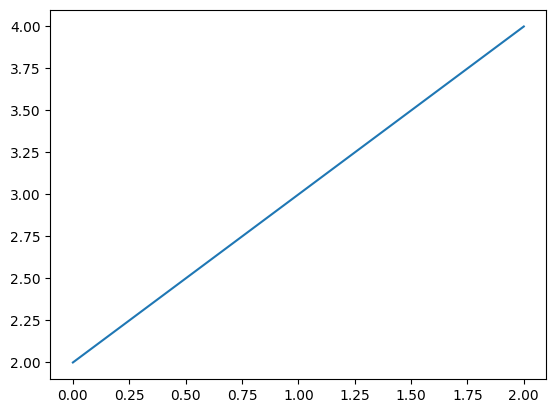

In [25]:
plt.plot([2,3,4]) # x축은 인덱스로 y축에 데이터들이 들어감!~ 싱기방기
plt.show

### xlabel(), ylabel()

<function matplotlib.pyplot.show(close=None, block=None)>

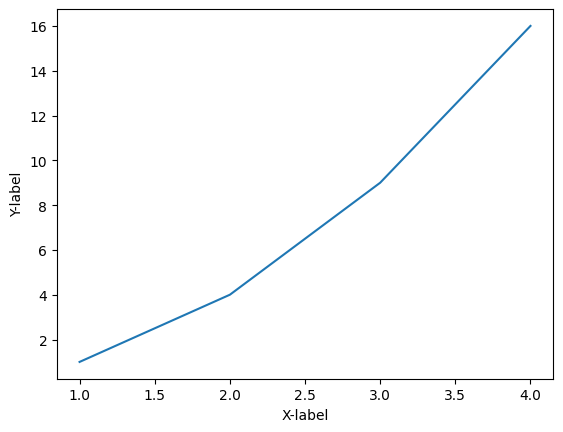

In [26]:
# 두 개의 리스트를 입력 시 순서대로 x,y 값으로 인식
# 라벨 설정 가능
plt.plot([1,2,3,4],[1,4,9,16]) # (1,1),(2,4),(3,9),(4,16)
plt.xlabel('X-label')
plt.ylabel('Y-label')
plt.show

In [27]:
x=[1,2,3,4]
y=np.square(x)
y, type(y)

(array([ 1,  4,  9, 16]), numpy.ndarray)

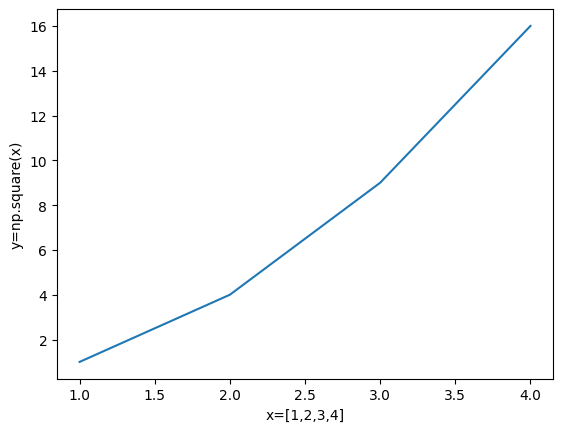

In [28]:
plt.plot(x,y)
plt.xlabel('x=[1,2,3,4]')
plt.ylabel('y=np.square(x)')
plt.show()

### legend()
범례 설계  
plot 함수에 label 파라미터로 설정가능  
설정 후 legend() 호출 주의  

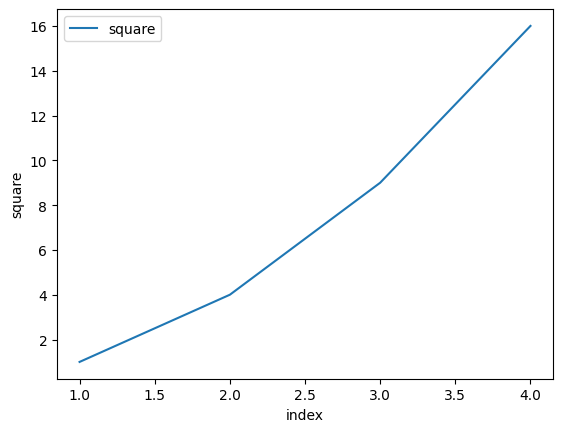

In [29]:
# 범례 설계 (legend())
# plot 함수에 label 파라미터로 설정가능
# 설정 후 legend() 호출 주의
plt.plot(x,y,label='square')
plt.xlabel('index')
plt.ylabel('square')
plt.legend()
plt.show()

#### 축 범위 설정  